<a href="https://colab.research.google.com/github/raquelgosalbezsirvent/Diabetes-Health-Indicators-ML/blob/main/Practica_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación del paquete ucimlrepo

In [1]:
pip install ucimlrepo

# Dataset

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
Y = cdc_diabetes_health_indicators.data.targets

X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [7]:
# metadata
#print(cdc_diabetes_health_indicators.metadata)

# variable information
import pandas as pd

# Convert variables information to a Pandas DataFrame
variables_df = pd.DataFrame(cdc_diabetes_health_indicators.variables)

# Display the DataFrame with descriptions
pd.set_option("display.max_colwidth", None)  # Show full descriptions
# Transpose and display the DataFrame
display(variables_df[['name', 'description']].style.set_properties(**{'text-align': 'left'}))

,name,description
0,ID,Patient ID
1,Diabetes_binary,0 = no diabetes 1 = prediabetes or diabetes
2,HighBP,0 = no high BP 1 = high BP
3,HighChol,0 = no high cholesterol 1 = high cholesterol
4,CholCheck,0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
5,BMI,Body Mass Index
6,Smoker,Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
7,Stroke,(Ever told) you had a stroke. 0 = no 1 = yes
8,HeartDiseaseorAttack,coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
9,PhysActivity,physical activity in past 30 days - not including job 0 = no 1 = yes


# 1. Exploración de los datos
## 1.1 Distribución de las Características

In [8]:
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']
categorical_columns = X.drop(columns=numerical_columns).columns.tolist()

print("Columnas numéricas:", numerical_columns)
print("Columnas categóricas:", categorical_columns)

Columnas numéricas: ['BMI', 'MentHlth', 'PhysHlth']
Columnas categóricas: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


### 1.1.1. Análisis univariado
#### Variables categóricas

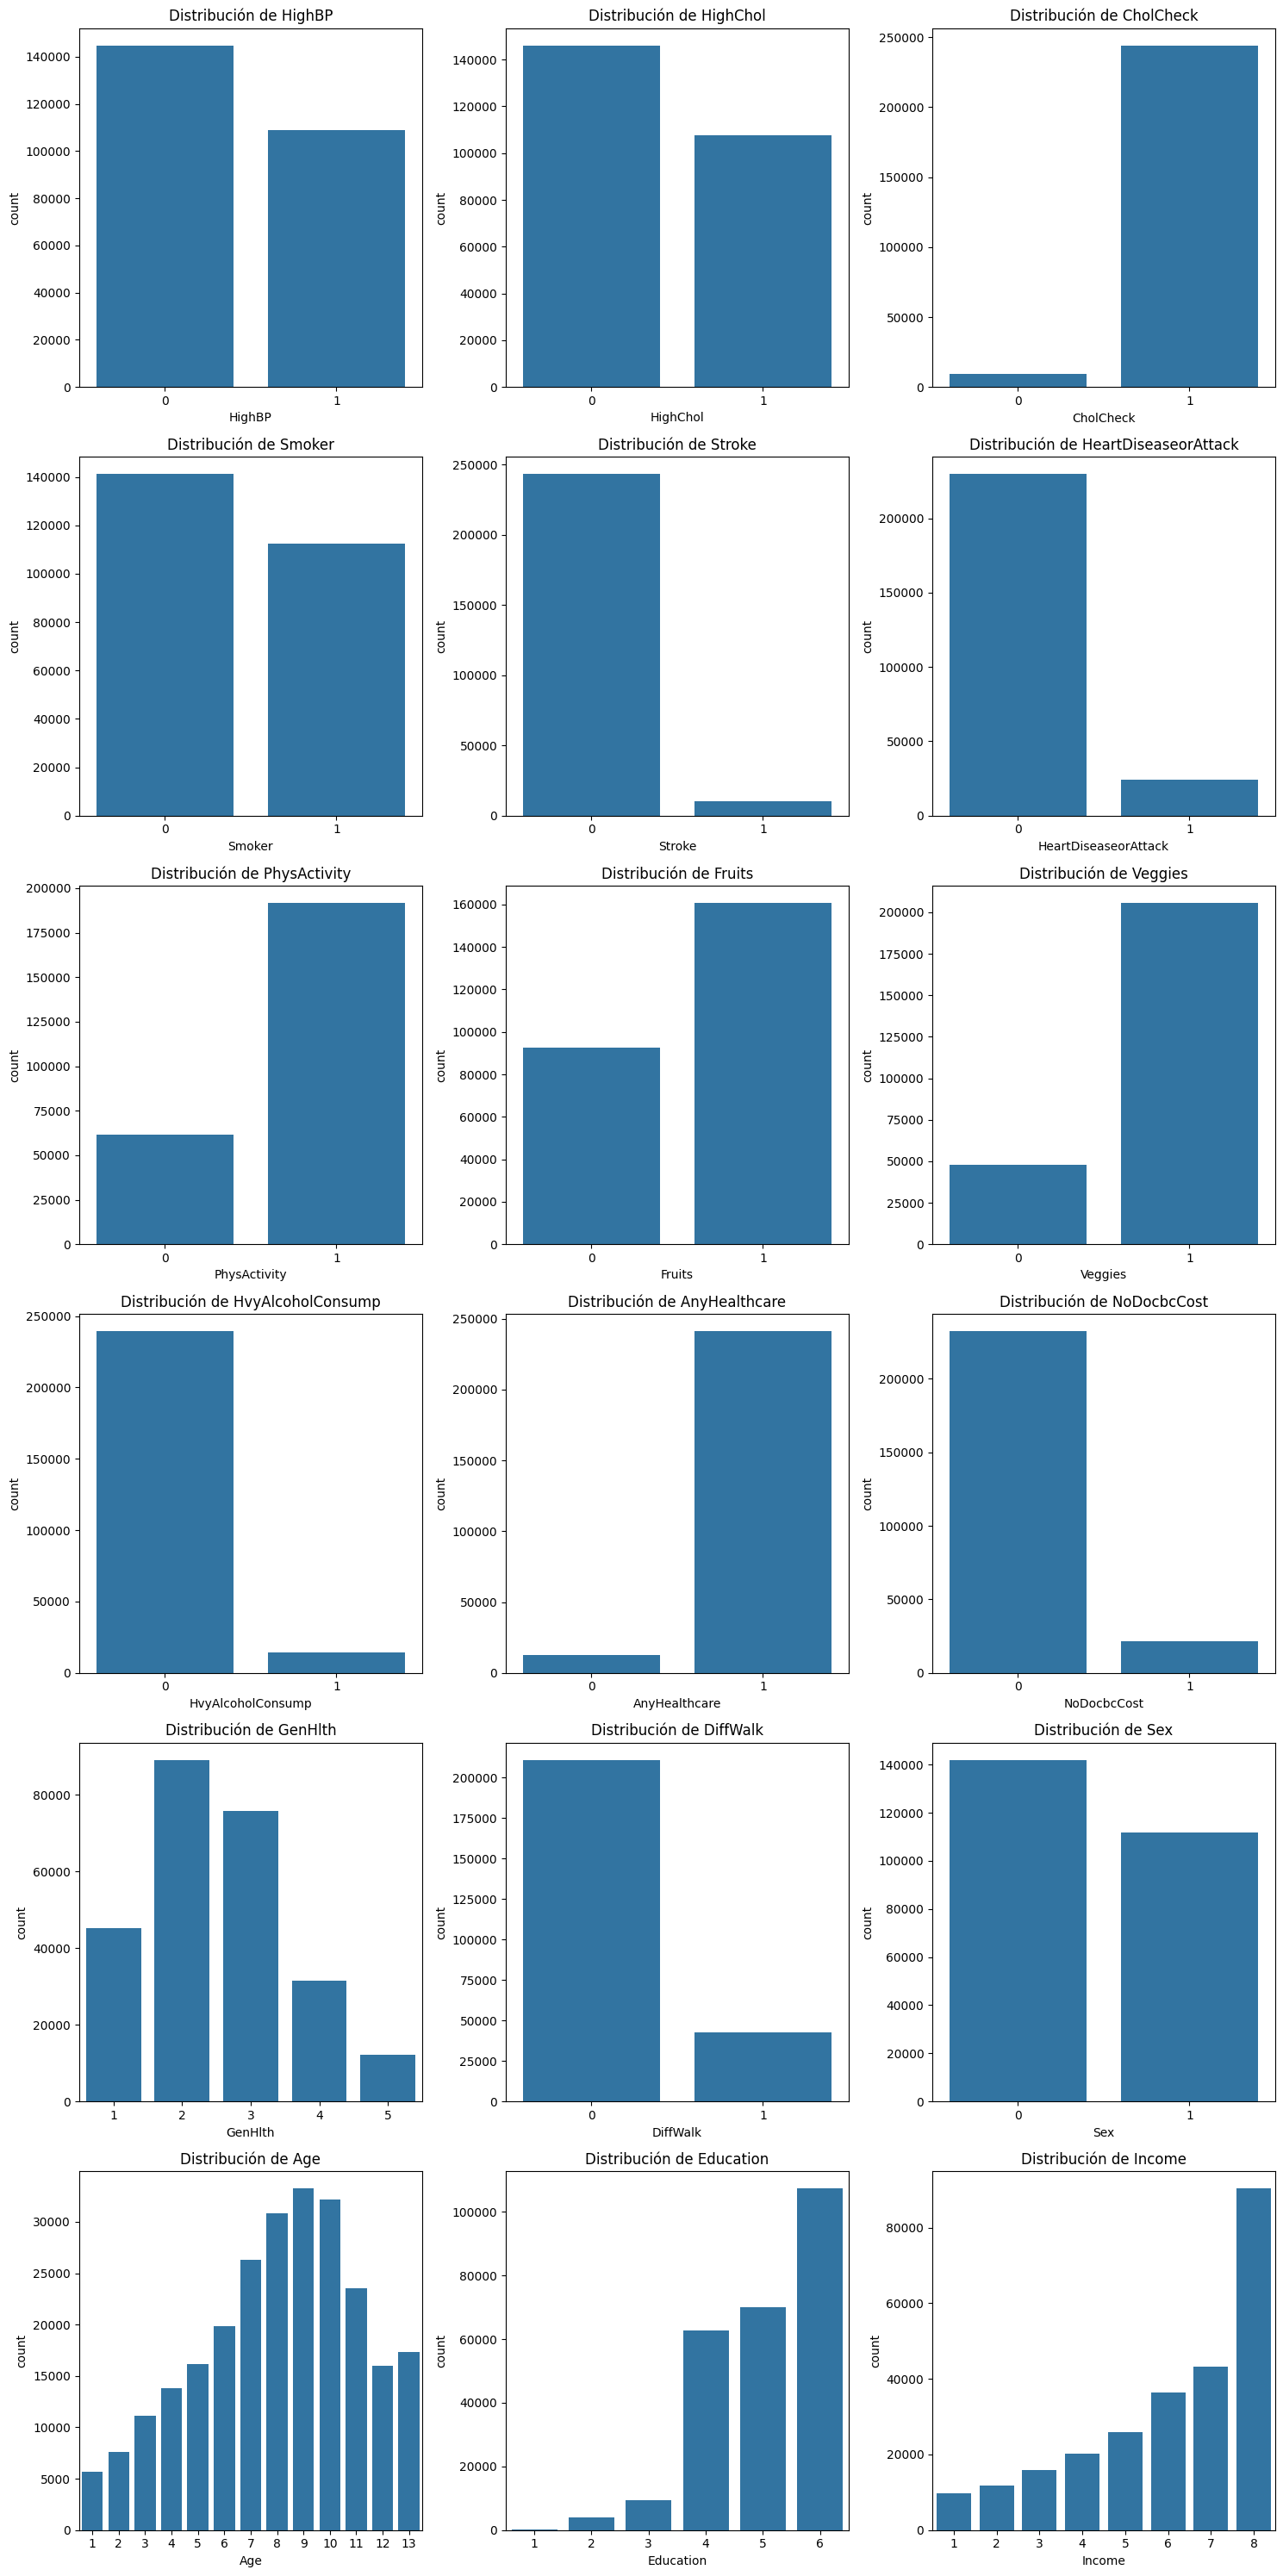

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns in the grid
num_rows = int(len(categorical_columns) / num_cols) + (len(categorical_columns) % num_cols > 0)  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on the number of rows
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated rows and columns
    sns.countplot(x=X[col])
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

#### Variables numéricas

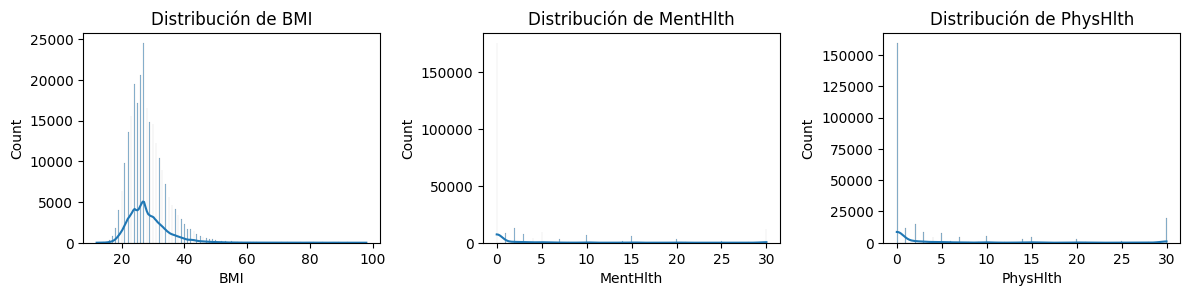

In [11]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

### 1.1.2. Análisis bivariado
#### Variables

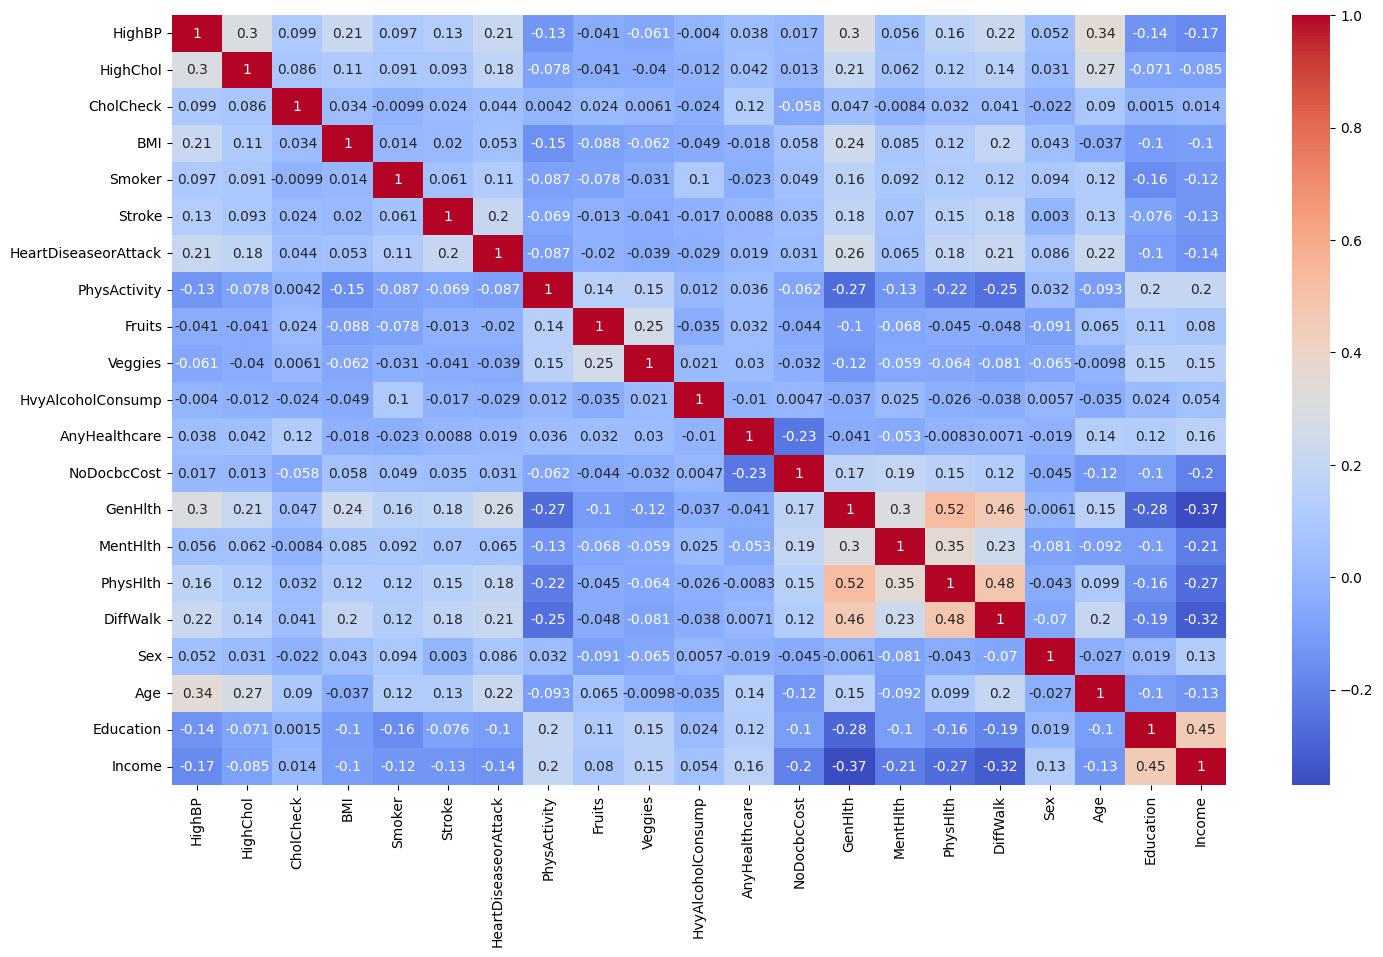

In [12]:
import seaborn as sns
plt.figure(figsize=(17, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Target

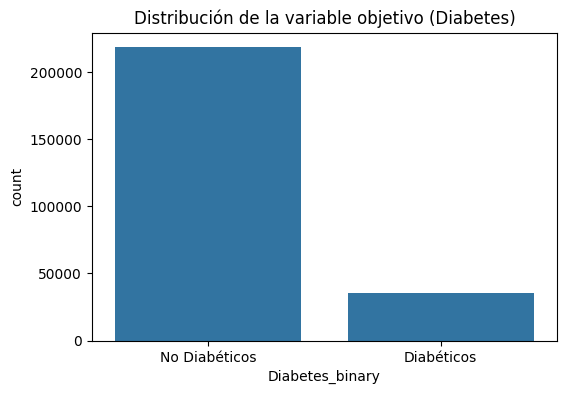

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=Y.Diabetes_binary)
plt.title('Distribución de la variable objetivo (Diabetes)')
plt.xticks([0, 1], ['No Diabéticos', 'Diabéticos'])
plt.show()

### 1.1.3. Identificación de outliers

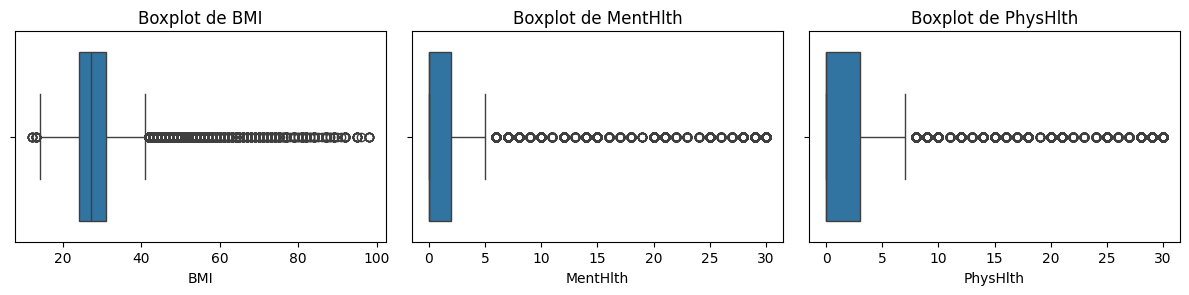

In [13]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

### 1.1.4. Relación entre características y objetivo
#### Numéricas y target

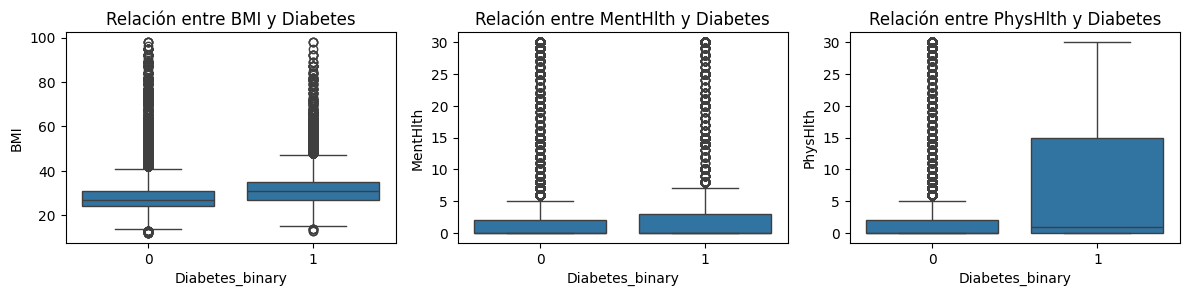

In [14]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=Y.Diabetes_binary, y=X[col])
    plt.title(f"Relación entre {col} y Diabetes")

plt.tight_layout()
plt.show()

#### Categóricas y target

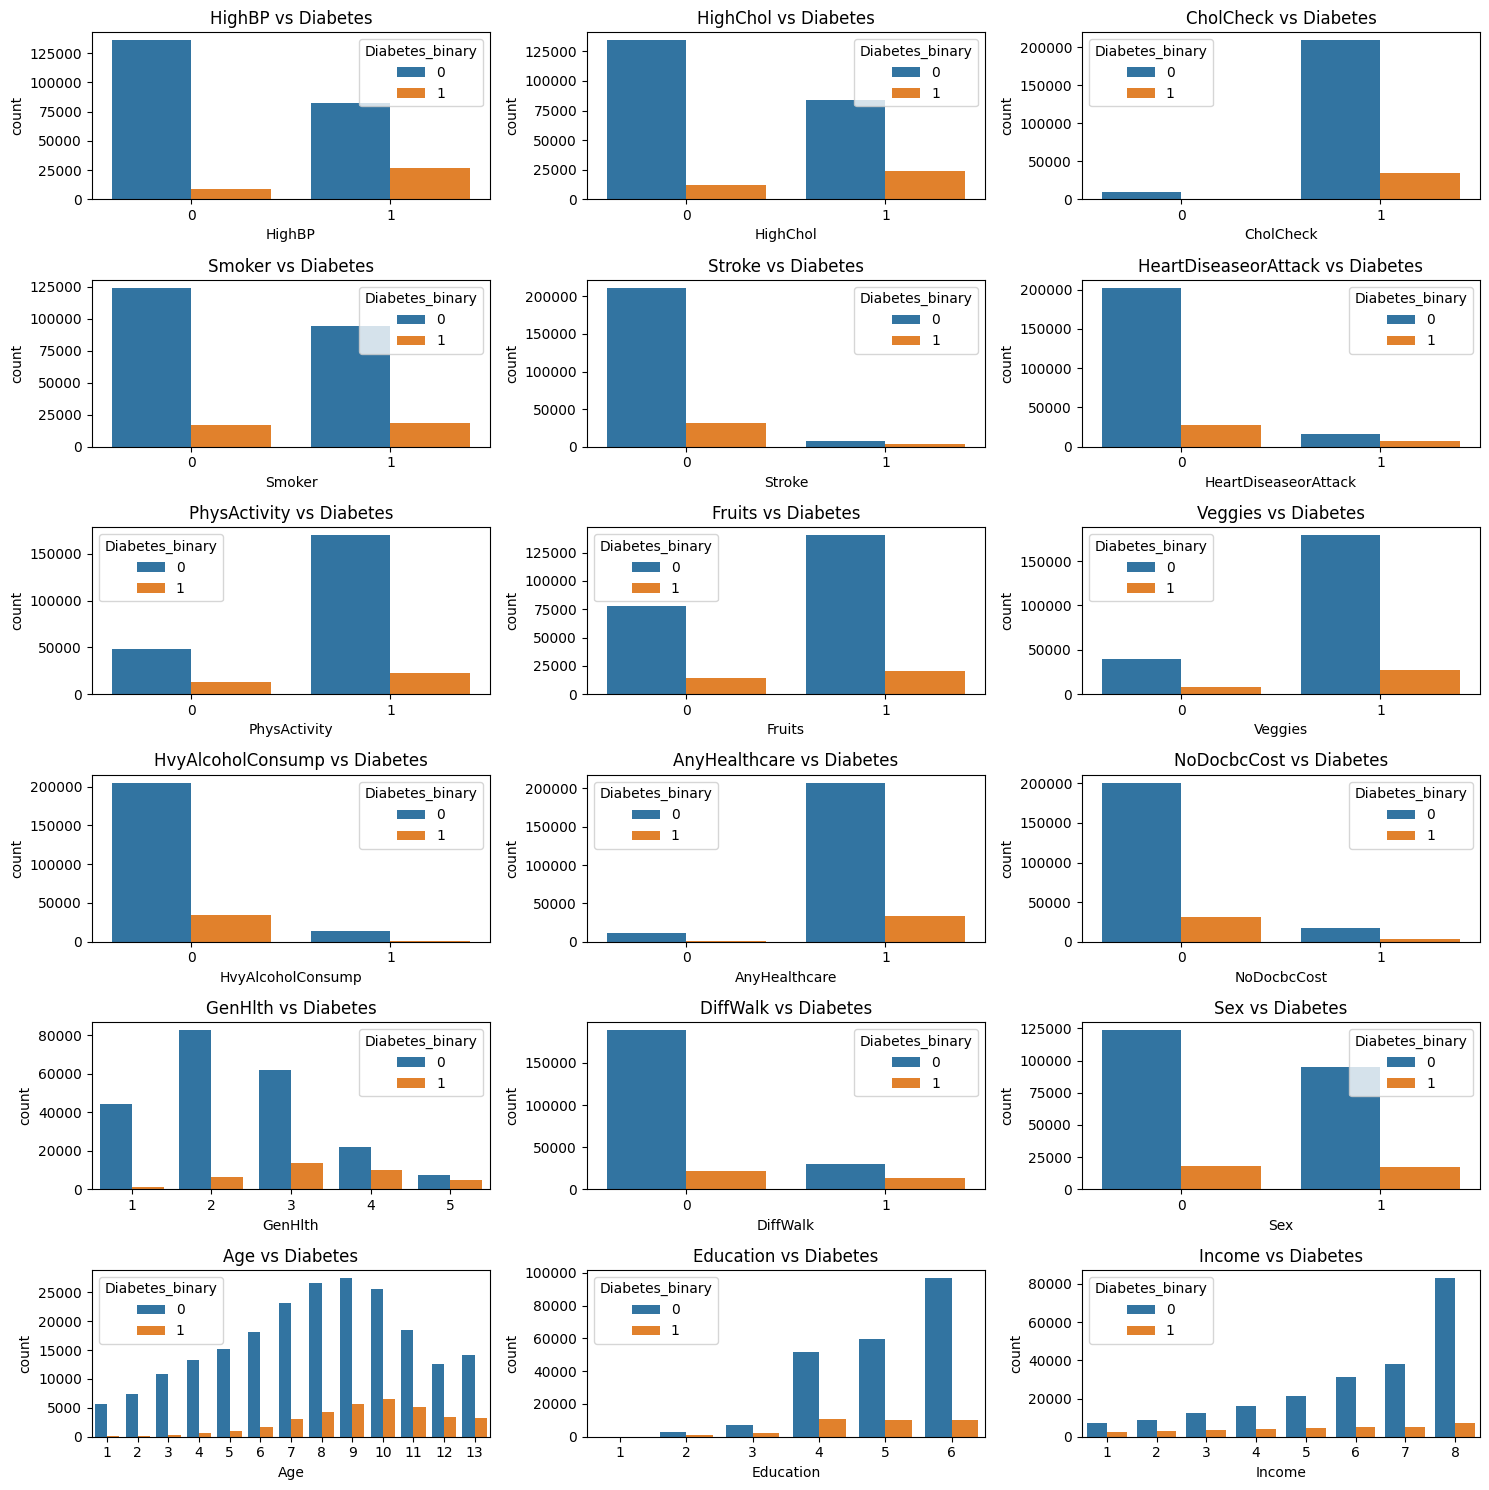

In [15]:
plt.figure(figsize=(15, 15)) # Increased figure size to accommodate more plots
num_cols = 3  # Number of columns in the grid
num_rows = int(len(categorical_columns) / num_cols) + (len(categorical_columns) % num_cols > 0)  # Calculate the number of rows needed


for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated rows and columns
    sns.countplot(x=X[col], hue=Y.Diabetes_binary)
    plt.title(f"{col} vs Diabetes")

plt.tight_layout()
plt.show()

# Preprocesamiento
## Manejo de valores faltantes


In [ ]:
print(X.isnull().sum())
print(Y.isnull().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Diabetes_binary    0
dtype: int64


Se concluye que no hay valores faltantes

## Codificación de variables categóricas

In [ ]:
print(X.dtypes)

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


Se observa que todas las variables son numéricas y que no es necesario la codificación.